# **Import Neccessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Load datset**

In [ ]:
df = pd.read_csv("/content/df_sarima.csv")
df.head()

,Date,Country(UK),Product,Quantity,Cost,Profit,Revenue
0,2000-01-02,Wales,Caramel,1570.0,3140.00,4710.00,2464900.0
1,2000-01-06,Wales,Plain,1958.0,391.60,1566.40,2300258.4
2,2000-01-06,N. Ireland,Biscuit,1101.0,2422.20,3082.80,727320.6
3,2000-01-06,Jersey,Caramel Nut,2755.0,7576.25,8953.75,3795012.5
4,2000-01-07,Scotland,Caramel,1901.0,3802.00,5703.00,3613801.0


# **Data Cleaning aur Currency Formatting**
## Currency symbols (£) aur commas khatam karke data ko numeric mein convert karna

In [ ]:
# Clean currency symbols and commas before renaming
for col in ['Cost(£)','Profit(£)','Revenue(£)','Units Sold']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[£,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# **Date Formatting aur Time-Series Indexing**
##Date column ko 'datetime' format mein badal kar index banana aur data ko sort karna

In [ ]:
# Date ko datetime mein badlein aur index banayein
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# **Monthly Data Resampling aur Aggregation**
##Daily data ko Monthly total (Sum) mein tabdeel karna taake patterns saaf nazar aayein

In [ ]:
# Kyunke ek hi date mein 2-3 sales hain, hum unhein Monthly sum kar lenge
df_monthly = df.resample('MS').sum()
df_monthly.head()

,Country(UK),Product,Quantity,Cost,Profit,Revenue
Date,,,,,,
2000-01-01,WalesWalesN. IrelandJerseyScotlandJerseyN. Ire...,CaramelPlainBiscuitCaramel NutCaramelBiscuit N...,23503.0,39045.60,56225.40,32948218.8
2000-02-01,N. IrelandN. IrelandJerseyScotlandJerseyJersey...,Caramel NutCaramelBiscuit NutCaramel NutChocol...,12177.0,24150.65,32357.35,14532129.9
2000-03-01,EnglandEnglandWalesWalesScotlandN. IrelandEngl...,CaramelCaramelChocolate ChunkCaramelCaramel Nu...,24480.0,32190.70,49156.30,29651604.6
2000-04-01,ScotlandWalesEnglandEnglandJerseyScotlandScotl...,CaramelPlainCaramelCaramelCaramelCaramelChocol...,30287.0,54518.85,76335.15,43871000.1
2000-05-01,N. IrelandEnglandN. IrelandN. IrelandN. Irelan...,CaramelCaramelChocolate ChunkCaramel NutBiscui...,28087.0,49828.80,68626.20,32054952.6


# **Specific Columns ki Selection aur Resampling**
##Sirf zaroori numeric columns ko select karke unka Monthly Total nikalna

In [ ]:
# Sirf numeric columns ko resample karein
df_monthly = df[['Quantity', 'Cost', 'Profit', 'Revenue']].resample('MS').sum()

# Ab check karein
df_monthly.head()

,Quantity,Cost,Profit,Revenue
Date,,,,
2000-01-01,23503.0,39045.60,56225.40,32948218.8
2000-02-01,12177.0,24150.65,32357.35,14532129.9
2000-03-01,24480.0,32190.70,49156.30,29651604.6
2000-04-01,30287.0,54518.85,76335.15,43871000.1
2000-05-01,28087.0,49828.80,68626.20,32054952.6


# **Monthly Profit Trend ki Visualization**
##Monthly Profit ka line graph banana taake trend aur peaks ko visualy samjha ja sake

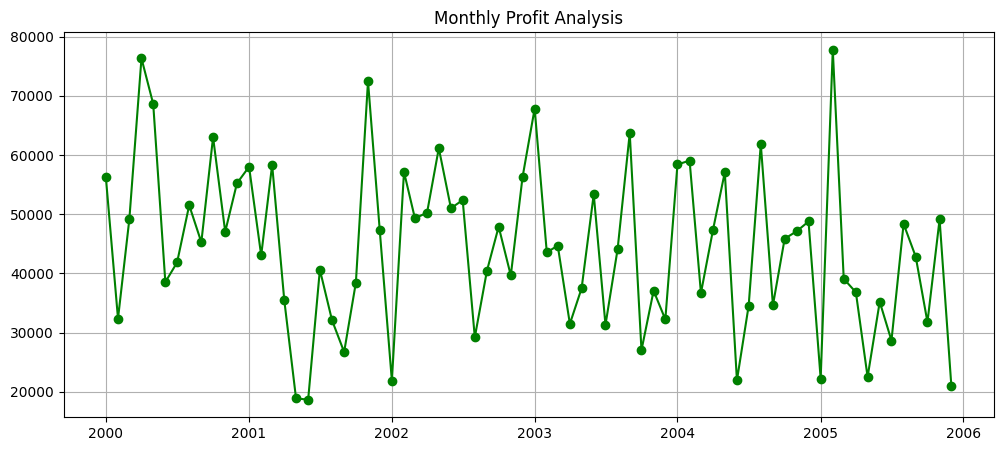

In [ ]:
# Monthly Profit ko plot karke trend dekhein
plt.figure(figsize=(12,5))
plt.plot(df_monthly['Profit'], color='green', marker='o')
plt.title('Monthly Profit Analysis')
plt.grid(True)
plt.savefig("Monthly Profit Analysis.png", dpi=300, bbox_inches = 'tight')
plt.show()

# **Yearly Slicing aur Specific Year Analysis**
##Sirf saal 2000 ka data alag (Slice) karke uska barsi trend check karna

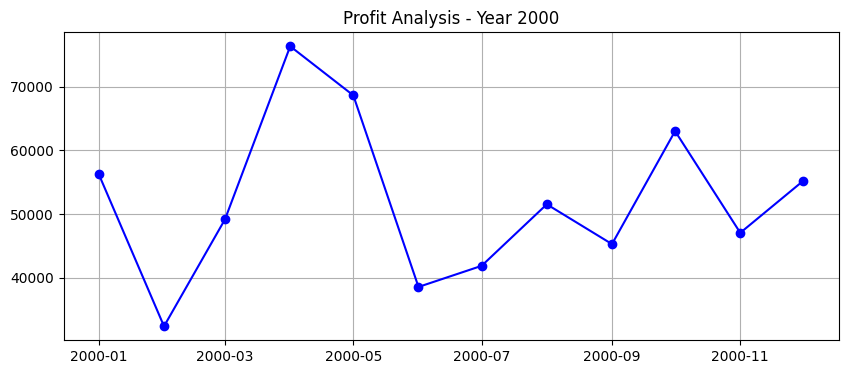

In [ ]:
# Sirf saal 2000 ka data alag karein
year_2000 = df_monthly['2000-01-01':'2000-12-31']

# Iska plot banayein
plt.figure(figsize=(10,4))
plt.plot(year_2000['Profit'], color='blue', marker='o')
plt.title('Profit Analysis - Year 2000')
plt.grid(True)
plt.savefig("Profit Analysis - Year 2000.png", dpi=300, bbox_inches = 'tight')
plt.show()

# **Custom Time Period ki Deep-Dive Analysis**
##Do saalon ke darmiyan ka makhsoos (custom) period select karke trend check karna

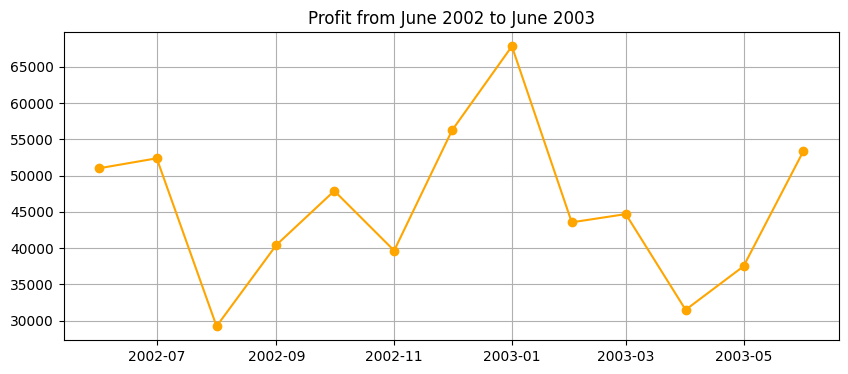

In [ ]:
# Custom range select karein
custom_range = df_monthly['2002-06-01':'2003-06-01']

plt.figure(figsize=(10,4))
plt.plot(custom_range['Profit'], color='orange', marker='o')
plt.title('Profit from June 2002 to June 2003')
plt.grid(True)
plt.savefig("Profit from June 2002 to June 2003.png", dpi=300, bbox_inches = 'tight')
plt.show()

# **Quantity Sales Trend ki Visualization**
##Sales Quantity ka trend dekhna taake profit aur units sold ka talluq samjha ja sake

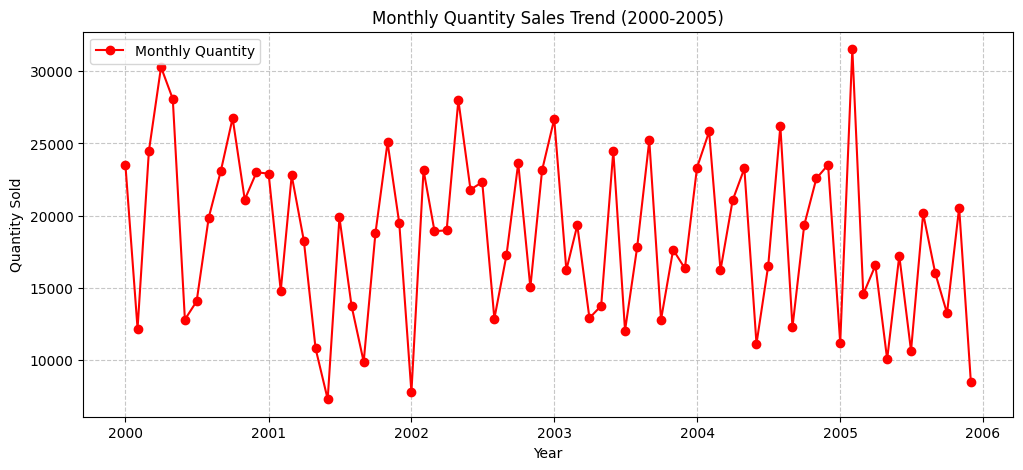

In [ ]:
# Quantity ka trend dekhne ke liye code
plt.figure(figsize=(12,5))
plt.plot(df_monthly['Quantity'], color='red', marker='o', label='Monthly Quantity')

# Title aur Labels
plt.title('Monthly Quantity Sales Trend (2000-2005)')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')

# Grid aur Legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Graph save karne ka option
plt.savefig("Monthly_Quantity_Trend.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

# **Profit aur Quantity ka Comparative Analysis (Subplots)**
##Profit aur Quantity ko upar-neeche plot karna taake unka aapsi talluq (correlation) dekha ja sake

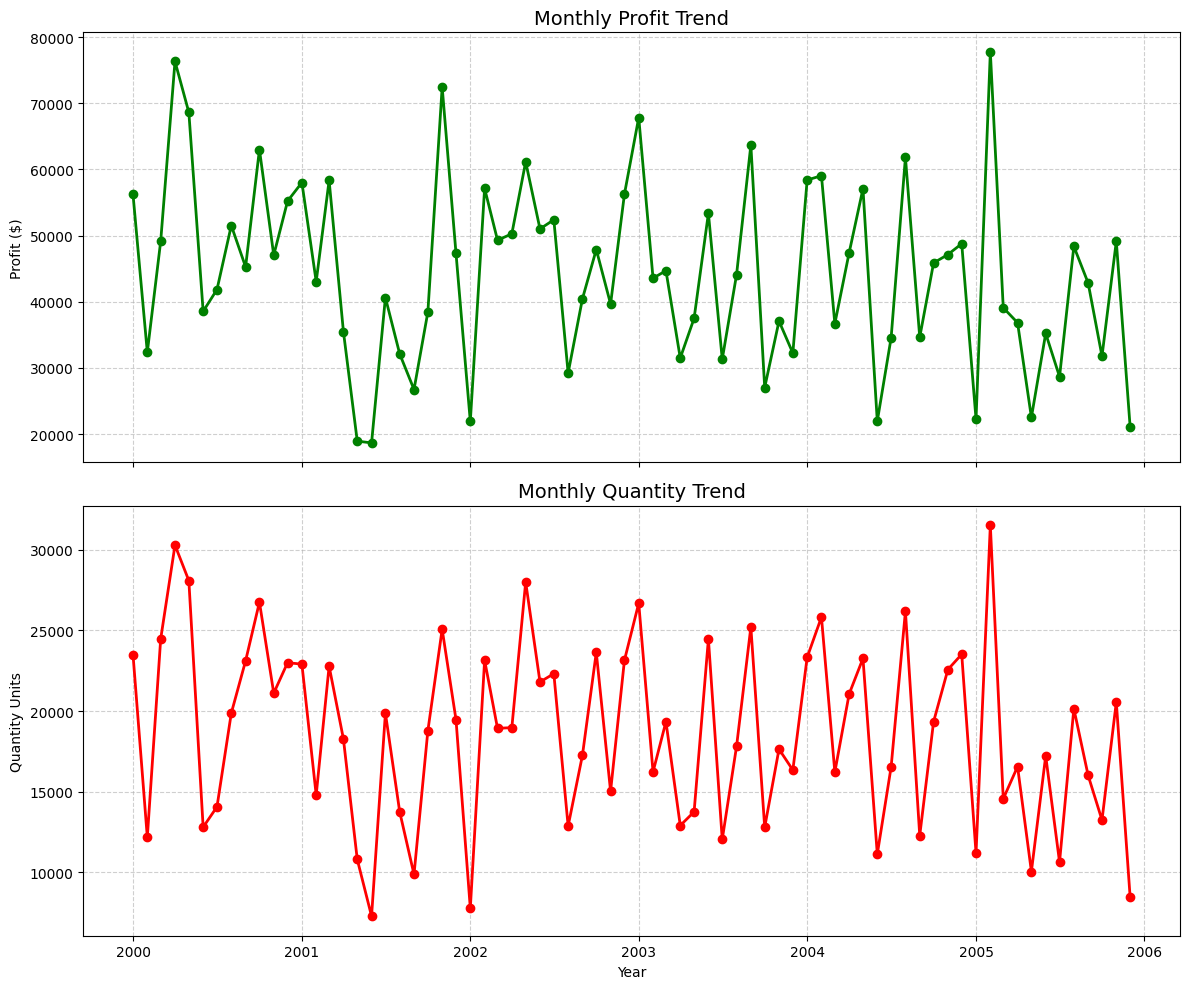

In [ ]:
import matplotlib.pyplot as plt

# 2 Graphs ka frame banana (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Pehla Graph: Profit
ax1.plot(df_monthly.index, df_monthly['Profit'], color='green', marker='o', linewidth=2)
ax1.set_title('Monthly Profit Trend', fontsize=14)
ax1.set_ylabel('Profit ($)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Doosra Graph: Quantity
ax2.plot(df_monthly.index, df_monthly['Quantity'], color='red', marker='o', linewidth=2)
ax2.set_title('Monthly Quantity Trend', fontsize=14)
ax2.set_ylabel('Quantity Units')
ax2.grid(True, linestyle='--', alpha=0.6)

# Labels aur Layout
plt.xlabel('Year')
plt.tight_layout()

# Save aur Show
plt.savefig("Profit_vs_Quantity_Subplot.png", dpi=300)
plt.show()

# **Seasonal Decomposition (Trend, Seasonality, aur Noise Analysis)**
## Profit data ko uske components (Trend, Seasonality, aur Residuals) mein tod kar analysis karna

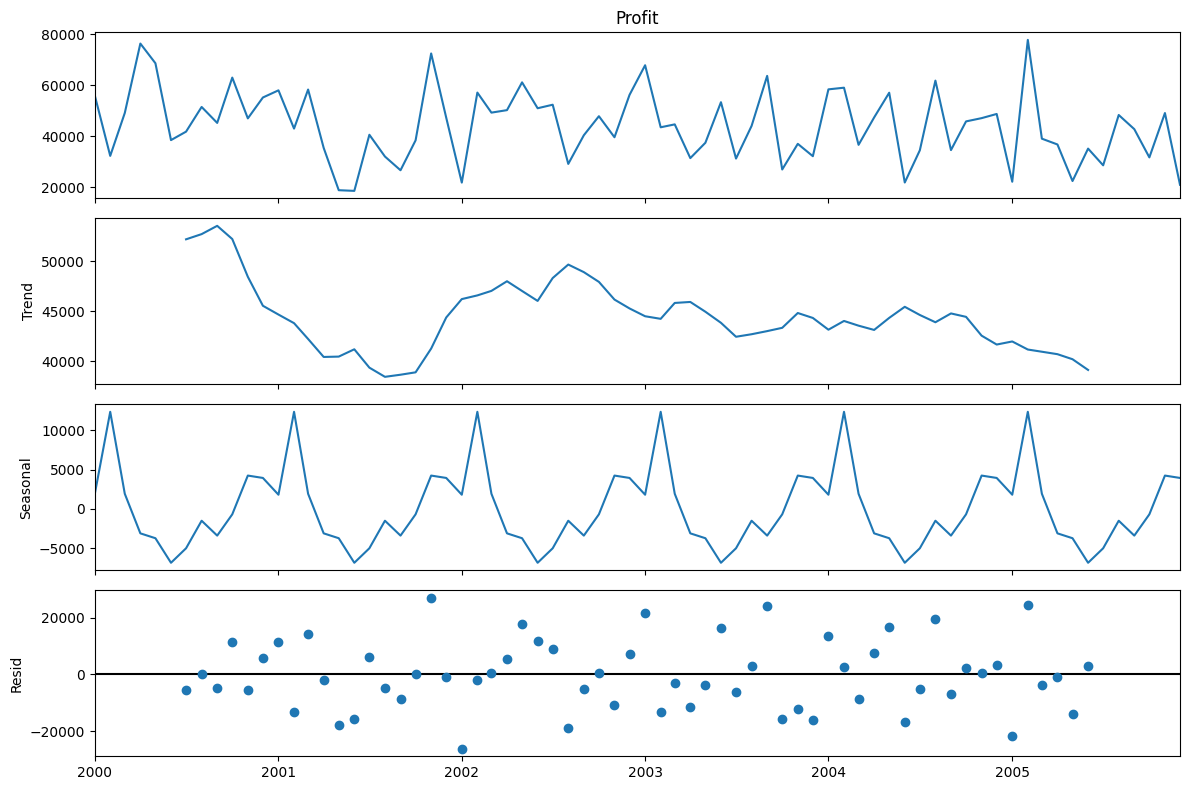

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition karein (period=12 kyunke saal mein 12 mahine hote hain)
decomp = seasonal_decompose(df_monthly['Profit'], model='additive', period=12)

# Graph plot karein
plt.rcParams['figure.figsize'] = (12, 8)
decomp.plot()
plt.savefig("Profit_Decomposition.png", dpi=300)
plt.show()

# **Augmented Dickey-Fuller (ADF) Test for Stationarity**
## Statistical test ke zariye check karna ke data "Stationary" hai ya nahi (Forecasting ki buniyadi shart)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Profit column ka stationarity check
result = adfuller(df_monthly['Profit'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.77403742217543
p-value: 8.765732016636905e-12


# **Model ko Define aur Train karna**
## SARIMA model ko configure karna aur data par train karna

In [ ]:
import statsmodels.api as sm

# SARIMA Model define karna:
# order=(1,0,1) matlab (p,d,q). d=0 hai kyunke data stationary hai.
# seasonal_order=(1,1,1,12) matlab har 12 mahine baad pattern repeat hota hai.
model = sm.tsa.statespace.SARIMAX(df_monthly['Profit'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12))

# Model ko data par fit (train) karna
results = model.fit()

print("Model Training Completed!")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Training Completed!


# **Agle 12 Mahino ka Forecast nikalna**
## Train hue model se agle 1 saal ki predictions hasil karna

In [ ]:
# Model se agle 12 steps (yani 12 mahine) ka forecast mangna
forecast = results.get_forecast(steps=12)

# Forecasted values ko ek table (DataFrame) mein store karna
forecast_df = forecast.summary_frame()

# Is table mein aapko 'mean' (prediction) aur confidence intervals nazar ayenge
print(forecast_df.head())

Profit              mean       mean_se  mean_ci_lower  mean_ci_upper
2006-01-01  36962.325383  20718.153101   -3644.508522   77569.159287
2006-02-01  68003.659612  20831.626246   27174.422431  108832.896794
2006-03-01  38526.419776  20871.497619   -2380.963861   79433.803412
2006-04-01  40872.837227  20885.540883     -62.070701   81807.745156
2006-05-01  36722.159748  20890.491263   -4222.450747   77666.770242


# **Results ko Visualise (Graph) karna**
## ctual data aur Predicted data ka muqabla graph ke zariye dikhana

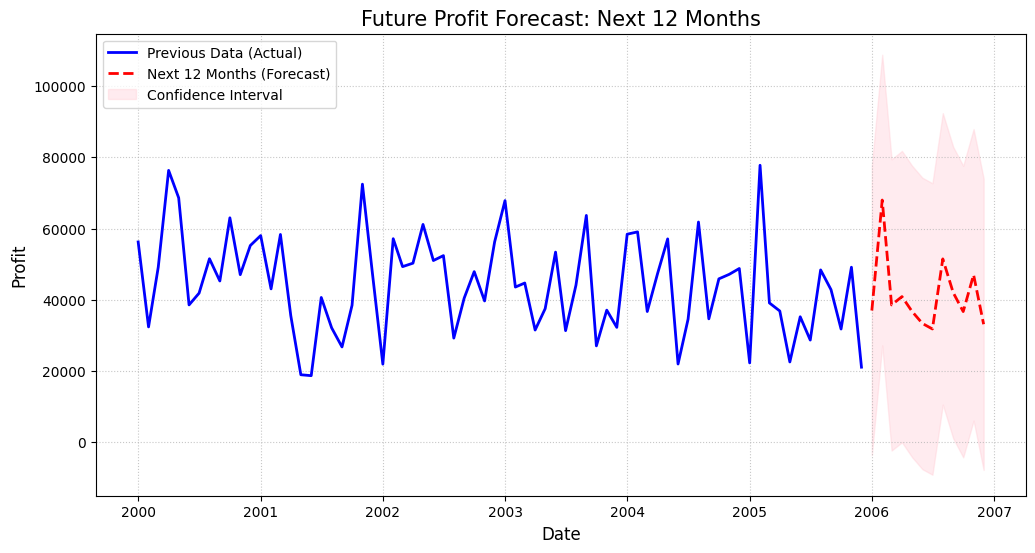

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# 1. Purana (Actual) data plot karna
plt.plot(df_monthly['Profit'], label='Previous Data (Actual)', color='blue', linewidth=2)

# 2. Future (Predicted) data plot karna (Dashed line mein)
plt.plot(forecast_df['mean'], label='Next 12 Months (Forecast)', color='red', linestyle='--', linewidth=2)

# 3. Confidence Interval (Pink shaded area jo khatray ya gunjayish ki had batata hai)
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')

# Graph ki khoobsurti ke liye titles aur labels
plt.title('Future Profit Forecast: Next 12 Months', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)

# Graph ko save karne ka code (plt.show se pehle likhna hai)
plt.savefig("Future_Profit_Forecast.png", dpi=300, bbox_inches='tight')

# Graph show karna
plt.show()

# **Agle 1 Saal ka Total Profit Takhmina (Estimation)**
## Agle 12 mahino ke forecasted profit ka total nikalna

In [ ]:
# Forecasted values ka total sum nikalna
total_forecasted_profit = forecast_df['mean'].sum()

print("-" * 30)
print(f"AGLE 1 SAAL KA TOTAL PROFIT: {total_forecasted_profit:,.2f}")
print("-" * 30)

------------------------------
AGLE 1 SAAL KA TOTAL PROFIT: 496,436.43
------------------------------


# **Accuracy Metrics (MAE & RMSE) Calculate Karna**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Model ke purane data par andaze (Predictions) nikalna
# 'fittedvalues' wo values hain jo model ne training ke doran predict ki thin
actual_values = df_monthly['Profit']
predicted_values = results.fittedvalues

# 2. MAE Calculate karna (Average deviation in dollars/units)
mae = mean_absolute_error(actual_values, predicted_values)

# 3. RMSE Calculate karna (Penalizes larger outliers)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# 4. Results print karna
print("=" * 40)
print(f"{'METRIC':<25} | {'VALUE':<10}")
print("-" * 40)
print(f"{'Mean Absolute Error':<25} | {mae:,.2f}")
print(f"{'Root Mean Squared Error':<25} | {rmse:,.2f}")
print("-" * 40)

# 5. Error Percentage aur Final Accuracy
avg_profit = actual_values.mean()
error_percent = (mae / avg_profit) * 100
accuracy = 100 - error_percent

print(f"{'Average Profit':<25} | {avg_profit:,.2f}")
print(f"{'Average Error %':<25} | {error_percent:.2f}%")
print(f"{'Final Model Accuracy':<25} | {accuracy:.2f}%")
print("=" * 40)

METRIC                    | VALUE     
----------------------------------------
Mean Absolute Error       | 19,850.43
Root Mean Squared Error   | 26,019.91
----------------------------------------
Average Profit            | 44,367.77
Average Error %           | 44.74%
Final Model Accuracy      | 55.26%


In [ ]:
import pickle

# 2. SARIMA Model ko save karna (Jo abhi humne banaya)
# SARIMA ke liye hum 'results' object save karte hain
with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Saved Succesfully!")

Saved Succesfully!


# **Complete Here**